
# Convert a molecule from SMILE to a computational graph

This tutorial is a natural continuation of the Basic Ball and Stick Models from SMILES.
It shows how we can extract any molecule


In [ ]:
!pip install rdkit

!pip install cirpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cirpy: filename=CIRpy-1.0.2-py3-none-any.whl size=7263 sha256=3695f62c4d88df37bd695790c4320bc8cd8baf2bc504d6253097066a76a253f2
  Stored in directory: /root/.cache/pip/wheels/af/e9/40/07942590380fbfa8fdfc46197f440ecb58eeddbea4f07758be
Successfully built cirpy


In [ ]:
!pip install py3Dmol

!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import py3Dmol
import cirpy
from torch_geometric.utils import from_smiles

We can easily obtain the graph representation of a molecule from its SMILE string using `torch_geometric.utils.from_smiles`

In [ ]:
mol = "methane"
methane_smile = cirpy.resolve(mol, "smiles")

data = from_smiles(methane_smile, with_hydrogen=True) #this extracts the graph representation of the molecule

print(f"The summary of molecule's 'data' is: {data}")


The summary of molecule's 'data' is: Data(x=[5, 9], edge_index=[2, 8], edge_attr=[8, 3], smiles='C')


Display some properties of the graph, node, and edges

In [ ]:
print(f"The number of nodes in graph is: {data.x.shape[0]}")
print(f"The number of edges in graph is: {data.edge_index.t().shape[0]}")
print(f"The number of node features in graph is: {data.x.shape[1]}")
print(f"The number of edge features in graph is: {data.edge_attr.shape[1]}")


print(f"The shape of the node feature matrix is: {data.x.shape}")
print(f"The shape of the edge index list/ or two-column matrix is: {data.edge_index.t().shape}")
print(f"The shape of the edge attribute matrix is: {data.edge_attr.shape}")

print(f"The node features of an atom in the graph are: {data.x[0]}")
print(f"The node features of the graph are: {data.x}")

The number of nodes in graph is: 5
The number of edges in graph is: 8
The number of node features in graph is: 9
The number of edge features in graph is: 3
The shape of the node feature matrix is: torch.Size([5, 9])
The shape of the edge index list/ or two-column matrix is: torch.Size([8, 2])
The shape of the edge attribute matrix is: torch.Size([8, 3])
The node features of an atom in the graph are: tensor([6, 0, 4, 5, 0, 0, 4, 0, 0])
The node features of the graph are: tensor([[6, 0, 4, 5, 0, 0, 4, 0, 0],
        [1, 0, 1, 5, 0, 0, 0, 0, 0],
        [1, 0, 1, 5, 0, 0, 0, 0, 0],
        [1, 0, 1, 5, 0, 0, 0, 0, 0],
        [1, 0, 1, 5, 0, 0, 0, 0, 0]])


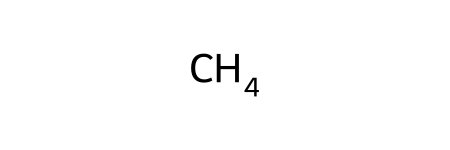

In [ ]:
molecule = Chem.MolFromSmiles(methane_smile)
molecule

Display some of the node or atom features in a molecule (or graph)

In [ ]:
atom = molecule.GetAtomWithIdx(0) # Get the first atom (a Carbon)

print(f"Atomic Number: {atom.GetAtomicNum()}")
print(f"Atom Index: {atom.GetIdx()}")
print(f"Atom Mass: {atom.GetMass()}")
print(f"Atom Degree: {atom.GetDegree()}")
print(f"Atom Hybridization: {atom.GetHybridization()}")
print(f"Atom Is Aromatic: {atom.GetIsAromatic()}")
print(f"Atom Is In Ring: {atom.IsInRing()}")
print(f"Atom Type: {atom.GetSymbol()}")
print(f"Formal Charge: {atom.GetFormalCharge()}")
print(f"Chirality: {atom.GetChiralTag()}")
print(f"Number of Hydrogens: {atom.GetTotalNumHs()}")


Atomic Number: 6
Atom Index: 0
Atom Mass: 12.011
Atom Degree: 0
Atom Hybridization: SP3
Atom Is Aromatic: False
Atom Is In Ring: False
Atom Type: C
Formal Charge: 0
Chirality: CHI_UNSPECIFIED
Number of Hydrogens: 4


In [ ]:
# Code to visualize ball and stick model of molecules
mol3d = Chem.AddHs(molecule)
AllChem.EmbedMolecule(mol3d, AllChem.ETKDGv3())
AllChem.UFFOptimizeMolecule(mol3d)
mb = Chem.MolToMolBlock(mol3d)

view = py3Dmol.view(width=450, height=360)
view.addModel(mb, 'sdf')
view.setStyle({'elem': 'C'}, {'stick': {'color': 'red', 'radius': 0.2},
                              'sphere': {'color': 'red', 'scale': 0.35}})
view.setStyle({'elem': 'H'}, {'stick': {'color': 'white', 'radius': 0.2},
                              'sphere': {'color': 'white', 'scale': 0.35}})
view.setBackgroundColor('white')
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.